In [1]:
import numpy as np
import pandas as pd

In [ ]:
""" 
A loss function maps decisions to their associated costs.


"""

 ### Difference between a Loss Function and a Cost Function

In [3]:
"""
A loss function is for a single training example. It is also sometimes called an error function. A cost function, on the other hand, is the average loss over the entire training dataset. The optimization strategies aim at 
minimizing the cost function.

"""

### Regression Loss functions

#### 1. Squared Error Loss


Squared Error loss for each training example, also known as L2 Loss, is the square of the difference between the actual and the predicted values:



The corresponding cost function is the Mean of these Squared Errors (MSE).
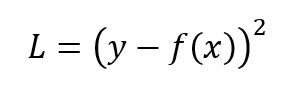

A quadratic function only has a global minimum. Since there are no local minima, we will never get stuck in one. Hence, it is always guaranteed that Gradient Descent will converge (if it converges at all) to the global minimum. The MSE loss function penalizes the model for making large errors by squaring them. Squaring a large quantity makes it even larger, right? But there’s a caveat. This property makes the MSE cost function less robust to outliers. Therefore, it should not be used if our data is prone to many outliers.



In [ ]:
"""
J = (y-predicted)^2
predicted = mx + b

J = (y-(mx+b))^2
where m, b are the parameters

dm = -2(y-mx-b))*x
db = -2(y-mx-b))



"""

In [ ]:
def update_weights_MSE(m, b, X, Y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    for i in range(N):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        m_deriv += -2*X[i] * (Y[i] - (m*X[i] + b))

        # -2(y - (mx + b))
        b_deriv += -2*(Y[i] - (m*X[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return m, b

#### 2. Absolute Error loss

Absolute Error for each training example is the distance between the predicted and the actual values, irrespective of the sign. Absolute Error is also known as the L1 loss:
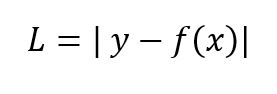


As I mentioned before, the cost is the Mean of these Absolute Errors (MAE).The MAE cost is more robust to outliers as compared to MSE. However, handling the absolute or modulus operator in mathematical equations is not easy. I’m sure a lot of you must agree with this! We can consider this as a disadvantage of MAE.
One big problem in using MAE loss (for neural nets especially) is that its gradient is the same throughout, which means the gradient will be large even for small loss values. This isn’t good for learning. To fix this, we can use dynamic learning rate which decreases as we move closer to the minima. MSE behaves nicely in this case and will converge even with a fixed learning rate. The gradient of MSE loss is high for larger loss values and decreases as loss approaches 0, making it more precise at the end of

In [5]:
def update_weights_MAE(m, b, X, Y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    for i in range(N):
        # Calculate partial derivatives
        # -x(y - (mx + b)) / |mx + b|
        m_deriv += - X[i] * (Y[i] - (m*X[i] + b)) / abs(Y[i] - (m*X[i] + b))

        # -(y - (mx + b)) / |mx + b|
        b_deriv += -(Y[i] - (m*X[i] + b)) / abs(Y[i] - (m*X[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return m, b

### 3. Huber Loss

The Huber loss combines the best properties of MSE and MAE. It is quadratic for smaller errors and is linear otherwise (and similarly for its gradient). 
It is identified by its delta parameter:
    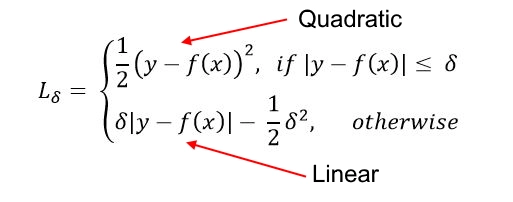



In [ ]:
def update_weights_hubber_loss(X,Y, m, b, delta, learning_rate):
    
    
    
    m_deriv = 0
    b_deriv = 0
    
    for i in range(len(X)):
        
        predict = m*X[i] + b
        
        if abs(y-predict) <= delta:
            m_deriv += -2*(Y[i]-predict)*X[i]
            b_deriv += -2*(Y[i]-predict)
            
        else:
            m_deriv+= -1* delta*(Y[i]-predict)*X[i]/abs(Y[i]-predict)
            b_deriv += -1*delta*(Y[i]-predict)/abs(Y[i]-predict)
            
        m-=learning_rate*m_deriv
        b-=learning_rate*b_deriv
            
        
        
        
    
    

### Binary Classification Loss Functions


#### Binary Cross Entropy Loss

Let us start by understanding the term ‘entropy’. Generally, we use entropy to indicate disorder or uncertainty. It is measured for a random variable X with probability distribution p(X):

loss function
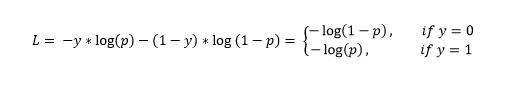
A greater value of entropy for a probability distribution indicates a greater uncertainty in the distribution. Likewise, a smaller value indicates a more certain distribution.
Then, the cross-entropy loss for output label y (can take values 0 and 1) and predicted probability p is defined as:
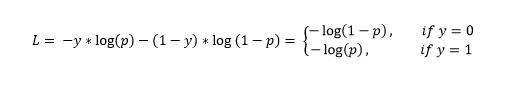
loss function

In [9]:
def update_weights_BCE(w1, w2, b, X1, X2, Y, learning_rate):
    dw1 = 0
    dw2= 0
    db = 0
    N = len(X1)
    for i in range(N):
        s = 1 / (1 / (1 + math.exp(-w1*X1[i] - w2*X2[i] - b)))
        
        # Calculate partial derivatives
        m1_deriv += -X1[i] * (s - Y[i])
        m2_deriv += -X2[i] * (s - Y[i])
        b_deriv += -(s - Y[i])

    # We subtract because the derivatives point in direction of steepest ascent
    m1 -= (m1_deriv / float(N)) * learning_rate
    m2 -= (m2_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return m1, m2, b

### Hinge Loss

Hinge loss is primarily used with Support Vector Machine (SVM) Classifiers with class labels -1 and 1. So make sure you change the label of the ‘Malignant’ class in the dataset from 0 to -1.

Hinge Loss not only penalizes the wrong predictions but also the right predictions that are not confident.
Hinge loss for an input-output pair (x, y) is given as:

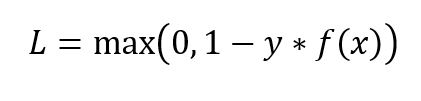

hinge loss

In [10]:
def update_weights_Hinge(m1, m2, b, X1, X2, Y, learning_rate):
    m1_deriv = 0
    m2_deriv = 0
    b_deriv = 0
    N = len(X1)
    for i in range(N):
        # Calculate partial derivatives
        if Y[i]*(m1*X1[i] + m2*X2[i] + b) <= 1:
            m1_deriv += -X1[i] * Y[i]
            m2_deriv += -X2[i] * Y[i]
            b_deriv += -Y[i]
        # else derivatives are zero

    # We subtract because the derivatives point in direction of steepest ascent
    m1 -= (m1_deriv / float(N)) * learning_rate
    m2 -= (m2_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return m1, m2, b

### Multi-Class Classification Loss Functions


The multi-class cross-entropy loss is a generalization of the Binary Cross Entropy loss. The loss for input vector X_i and the corresponding one-hot encoded target vector Y_i is:

loss function

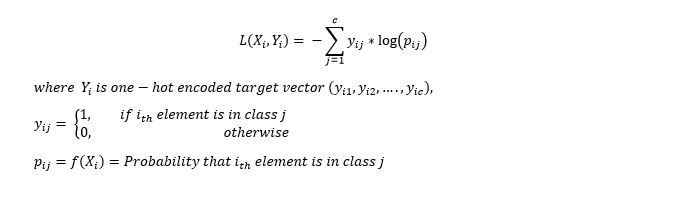
We use the softmax function to find the probabilities p_ij:

loss functionSource: Wikipedia


### KL-Divergence

The Kullback-Liebler Divergence is a measure of how a probability distribution differs from another distribution. A KL-divergence of zero indicates that the distributions are identical.
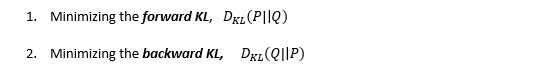
Notice that the divergence function is not symmetric.
I will describe the basic approach of using KL-Divergence as a loss function without getting into its math. We want to approximate the true probability distribution P of our target variables with respect to the input features, given some approximate distribution Q.  Since KL-Divergence is not symmetric, we can do this in two ways:
KL-Divergence is functionally similar to multi-class cross-entropy and is also called relative entropy of P with respect to Q